Zone d'importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Analyse exploratoire

    Affichage du dataset

In [2]:
data = pd.read_csv("Vente.csv", delimiter="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
dataseg = data.copy()

In [4]:
dataseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
dataseg.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Les différentes montants dépensés par produits que propose l'entreprise

depense = dataseg[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
depense.head(10)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
5,520,42,98,0,42,14
6,235,65,164,50,49,27
7,76,10,56,3,1,23
8,14,0,24,3,3,2
9,28,0,6,1,1,13


In [7]:
# Acceptation d'offre par campagne 
# Nous donne une idée de la campagne qui a atteint la satisfaction du client

campagne = dataseg[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]]
campagne.head(10)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,1
9,0,0,1,0,0,0


In [8]:
# Lieu où les clients achètent les différents produits

site_achat = dataseg[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]
site_achat.head(10)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
5,6,4,10
6,7,3,7
7,4,0,4
8,3,0,2
9,1,0,0


Vérification des valeurs manqauntes

In [9]:
# Nous n'avons que 24 valeurs manquants dans la colonne "Income".

dataseg.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
dataseg["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [11]:
dataseg["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [12]:
#Cette colonne n'a que des "3"

dataseg["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [13]:
#Cette colonne n'a que des "11"

dataseg["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

Nous disposons de deux variables qui ne figurent pas dans le descriptif entre autres "Z_CostContact" et "Z_Revenue".
Leurs valeurs sont fixes resp à "3" et "11". 
Tous les individus ont les mêmes infos cela ne nous avance pas à grand chose. Elles pourront être supprimées dans la suite.

. La colonne "Dt_Customer" qui est la Date d'inscription peut être supprimée dans la suite elle aussi car très peu informative.
<br> . La colonne "ID" de même.

Visualisation

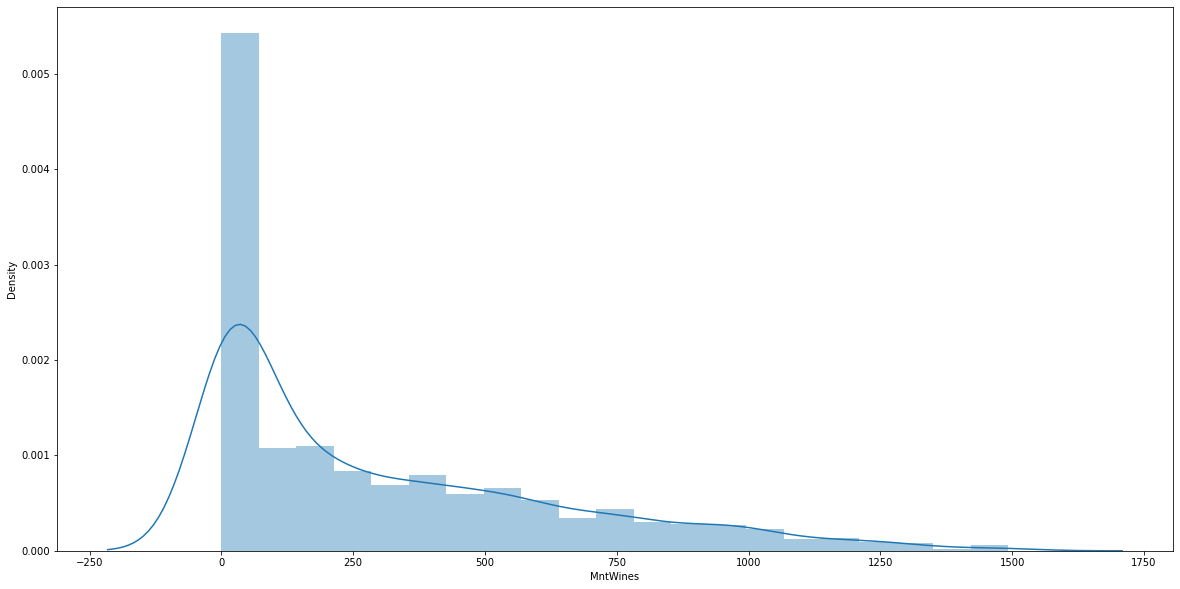

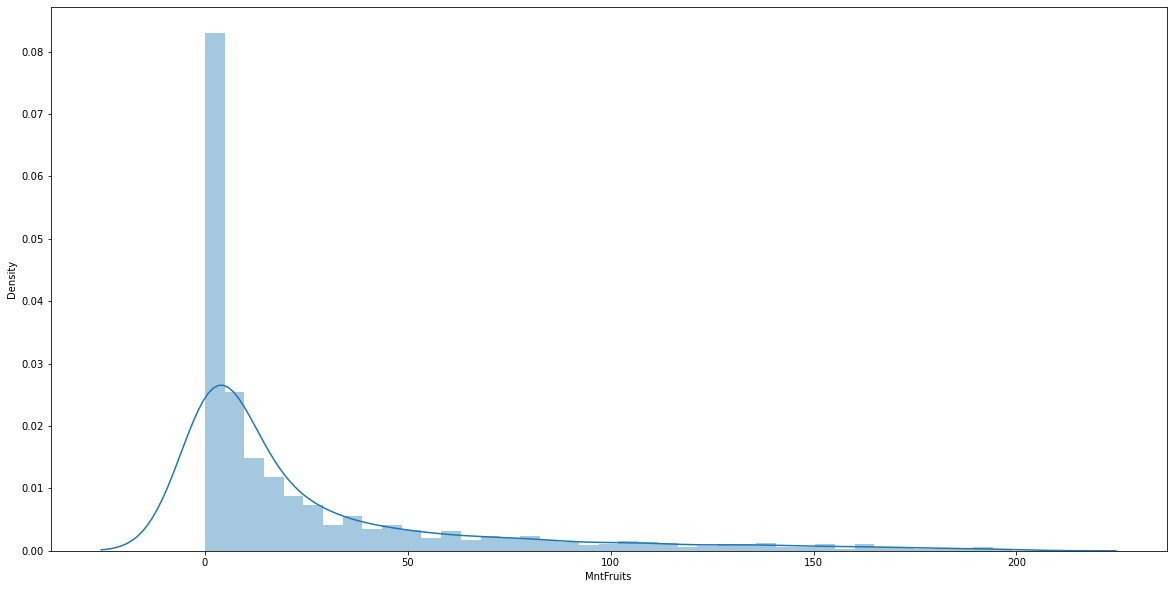

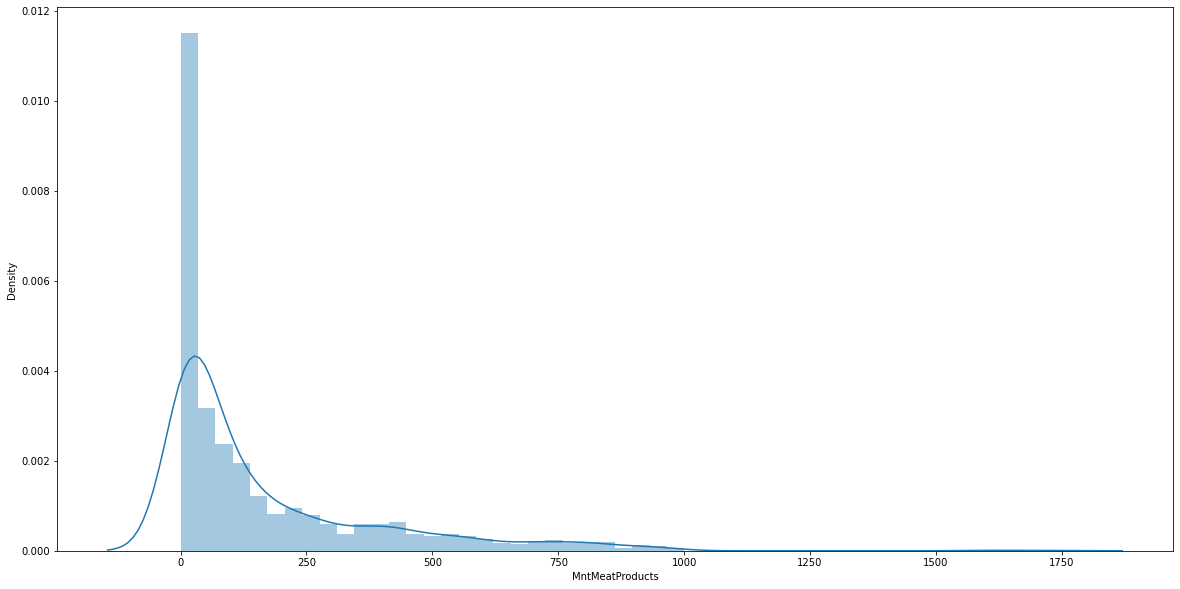

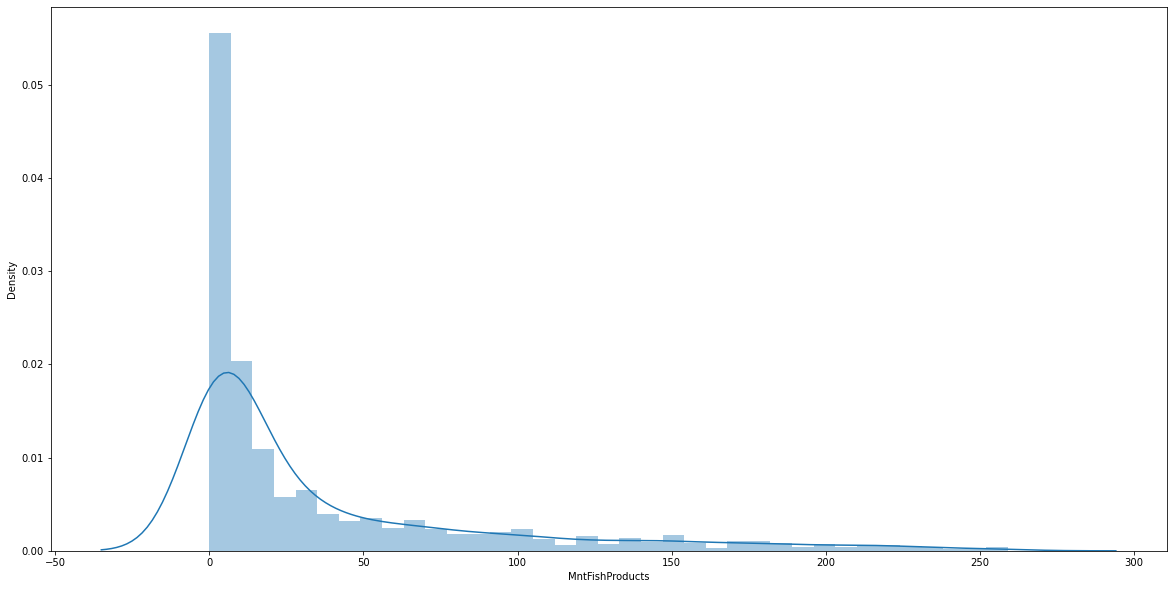

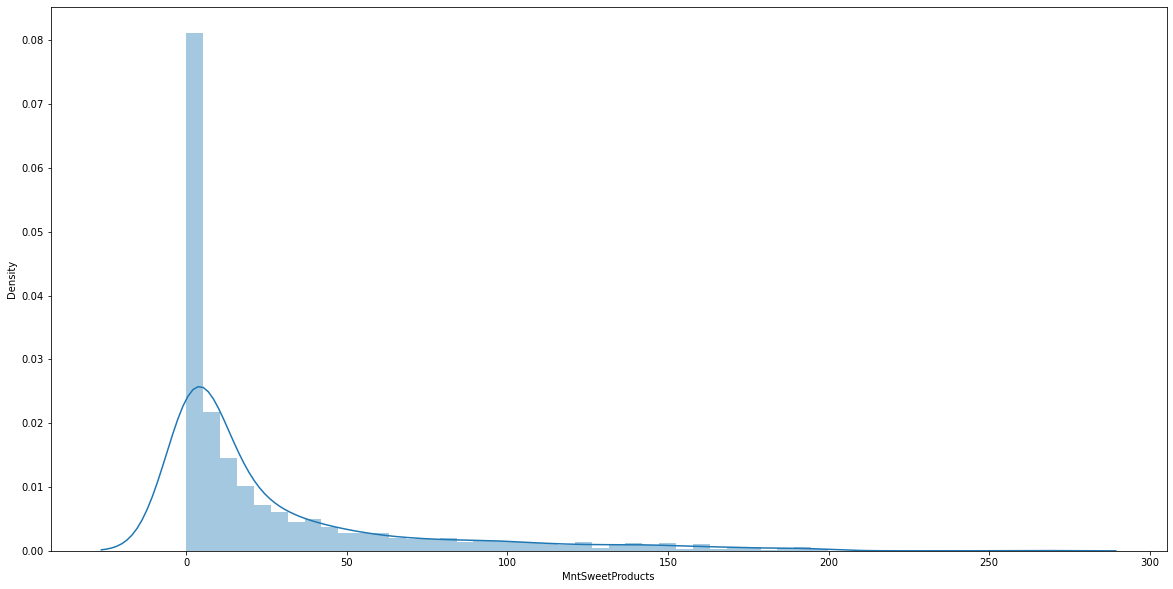

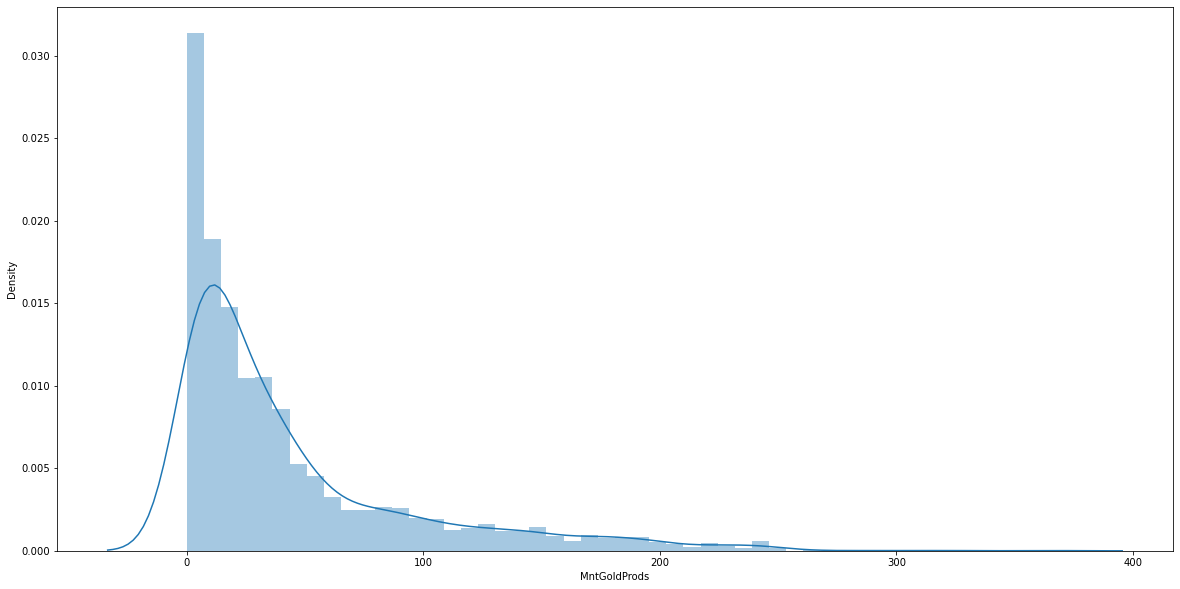

In [14]:
for col in depense : # variable continue
    plt.figure(figsize=(20,10))
    sns.distplot(dataseg[col]) # affichage des variable continue
    plt.show()

## Preprocessing

In [14]:
dataseg

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [15]:
# Encodage

def encodage(dataframe):
    code = {
        'Graduation':4, 'PhD':3, 'Master':2, "2n Cycle":1, "Basic":0,
        'YOLO':0,'Absurd':1,'Alone':2,'Widow':3, 'Divorced':4,'Single':5, 'Together':6, 'Married':7,
}
    
    for col in dataframe.select_dtypes('object').columns:
        dataframe.loc[:,col] = dataframe[col].map(code)
    
    return dataframe

In [16]:
encodage(dataseg)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,4,5,58138.0,0,0,NaN,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,4,5,46344.0,1,1,NaN,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,4,6,71613.0,0,0,NaN,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,4,6,26646.0,1,0,NaN,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,3,7,58293.0,1,0,NaN,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,4,7,61223.0,0,1,NaN,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,3,6,64014.0,2,1,NaN,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,4,4,56981.0,0,0,NaN,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,6,69245.0,0,1,NaN,8,428,...,3,0,0,0,0,0,0,3,11,0


In [17]:
# Suppression des colonnes que j'avais trouvé superflux.

dataseg = dataseg.drop(["ID","Dt_Customer","Z_CostContact", "Z_Revenue",], axis=1)

In [18]:
# Les données manquantes sont très peu alors je supprime la ligne des 24...
dataseg = dataseg.dropna()

In [19]:
dataseg

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,4,5,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,4,5,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,4,6,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,4,6,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,3,7,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,4,7,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,3,6,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,4,4,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,2,6,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


## Modélisation 

J'ai en tête d'utiliser le CLUSTERING pour la suite...